# Documentation for Standard BDT
- ROC AUC for different masses
- learning curve
- validation curves

# Standard imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import HpAlgorithms
import HpMLUtils
import HpMLPlots
import HpHyperParameterOptimisation
import HpTrainingFrame
reload(HpMLPlots)

<module 'HpMLPlots' from 'HpMLPlots.pyc'>

In [14]:
df_mc=pd.read_hdf('/eos/user/j/jglatzer/L2Output_R20_Nov_v2/pandas_ge6jge4b.h5', 'INC_ge6jge4b')

# Prepare data for H+ classification

split into test and training data

In [15]:
clf=HpAlgorithms.getGradientBDTClassifier()#options={"n_estimators":10})

In [16]:
htf=HpTrainingFrame.HpTrainingFrame(df_mc) 

# Getting the ROC AUC for all mass points (for a baseline)

In [18]:
reload(HpHyperParameterOptimisation)
hpmasses=[200,225,250,275,300,350,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000]
print "1-ROC AUC for different masses in 6j4b - test, train"
trainvalues=[]
testvalues=[]
for hpmass in hpmasses:
    X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass=hpmass)
    opt=HpHyperParameterOptimisation.HpOptimise("StandardBDT6j4bmHp"+str(hpmass),clf,X_train,y_train,w_train,X_test,y_test,w_test)
    test,train=opt.trainAndTest(silent=True)
    trainvalues.append(train)
    testvalues.append(test)
    print hpmass, test, train

1-ROC AUC for different masses in 6j4b - test, train
200 0.3290841140322679 0.224052149552876
225 0.3566890794845421 0.2157935730111732
250 0.3602662115193581 0.21995714942004074
275 0.34498428916467183 0.21217694504851836
300 0.33375748714257425 0.22569441917915023
350 0.32019286312547357 0.20269508665861058
400 0.29225728165594855 0.19289504310443972
500 0.23146437865390979 0.1719351936876632
600 0.18697956512088676 0.14299889654704268
700 0.14718158177504637 0.11455987360609443
800 0.11895855659790655 0.09314936032904542
900 0.09204235231427149 0.07911450117366337
1000 0.08130798049109356 0.06729081603336606
1200 0.05375180442290828 0.04586895300024363
1400 0.039379786382951254 0.03191298933224329
1600 0.028362194212484093 0.02363265917255053
1800 0.022254177247589824 0.01710164762786781
2000 0.0160571366514084 0.013340369605715496


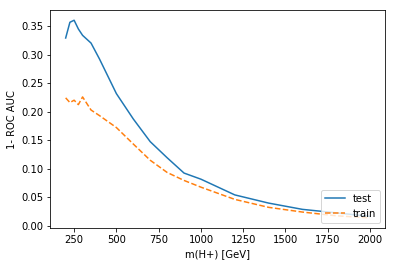

In [21]:
plt.plot(hpmasses, testvalues, '-', label='test')
plt.plot(hpmasses, trainvalues, '--', label='train')
plt.xlabel('m(H+) [GeV]')
plt.ylabel('1- ROC AUC')
plt.legend(loc="lower right")

# Hyperparameter Optimisation for m($H^{+}$)=800 GeV
We optimize for m(H+)=800 GeV and hope it holds more generally

In [22]:
X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass="800")
opt=HpHyperParameterOptimisation.HpOptimise("StandardBDT6j4bmHp800",clf,X_train,y_train,w_train,X_test,y_test,w_test)

## draw the ROC curve

starting training
training done
Saving plot as  roccurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_criterionfriedman_mse_initNone_learning_rate013_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_presortauto_random_state0_subsample10_verbose0_warm_startFalse.png


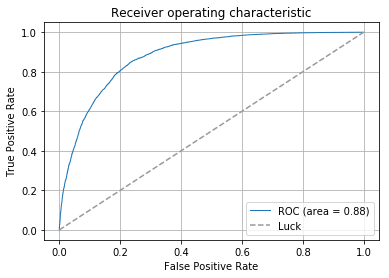

In [23]:
opt.saveROCCurve(fit=True)

## draw the learning curve

first for signal and background

Saving plot as  learningcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_criterionfriedman_mse_initNone_learning_rate013_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_presortauto_random_state0_subsample10_verbose0_warm_startFalse.png


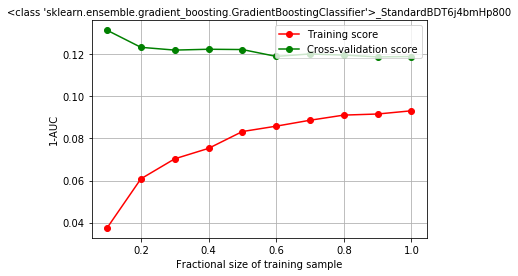

In [24]:
opt.saveLearningCurve()

then for signal only

Saving plot as  learningcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_criterionfriedman_mse_initNone_learning_rate013_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_presortauto_random_state0_subsample10_verbose0_warm_startFalse.png


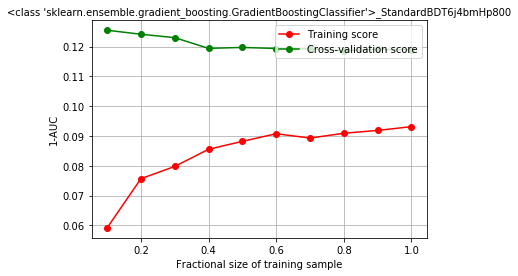

In [25]:
opt.saveLearningCurve(category=1)

then for background only

Saving plot as  learningcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_criterionfriedman_mse_initNone_learning_rate013_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_presortauto_random_state0_subsample10_verbose0_warm_startFalse.png


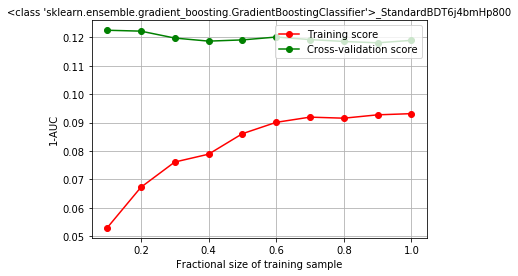

In [26]:
opt.saveLearningCurve(category=0)

## draw the validation curves

Validation curve for learning_rate
Training for  0.05
Training for  0.1
Training for  0.13
Training for  0.2
Training for  0.5
Saving plot as  validationcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_learning_rate_criterionfriedman_mse_initNone_learning_rate05_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_presortauto_random_state0_subsample10_verbose0_warm_startFalse.png
Validation curve for max_depth
Training for  3
Training for  4
Training for  5
Training for  6
Saving plot as  validationcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_max_depth_criterionfriedman_mse_initNone_learning_rate05_lossdeviance_max_depth6_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_presortauto_random_state0_subsample10_verbose0_warm_sta

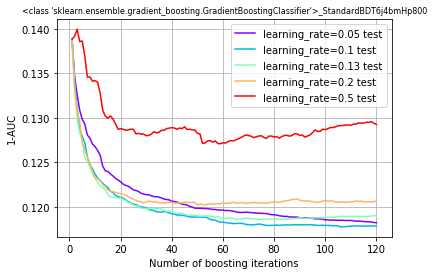

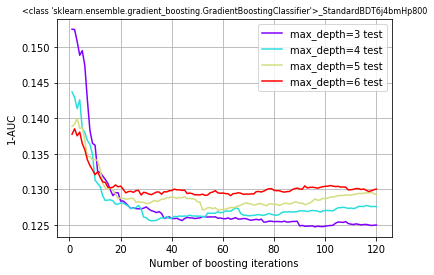

In [27]:
opt.saveAllValidationCurves()